# Libraries and pre-processing

In [ ]:
pip install NBEATS

In [ ]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 36.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install EMD-signal

     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 81 kB 9.6 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import pywt
import yfinance as yf
import copy
import warnings
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Concatenate
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D 
from tensorflow.keras.layers import Dense,LSTM,Dropout,Input,BatchNormalization,Conv1D, MaxPooling1D, Flatten, Lambda, Subtract, Add, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas import datetime
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from time import time
from NBEATS import NeuralBeats
import torch
from PyEMD import EMD


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


**DATA DOWNLOAD** *italicized text*

In [ ]:
GOOG = yf.download('GOOG', 
                      start='2010-01-01', 
                      end='2021-06-01', 
                      progress=False,
)

In [ ]:
MSFT = yf.download('MSFT', 
                      start='2010-01-01', 
                      end='2021-06-01', 
                      progress=False,
)

In [ ]:
# df1=pd.DataFrame(GOOG)
df3=pd.DataFrame(MSFT)

In [ ]:
# df1=df1['Close']
df3=df3['Close']

In [ ]:
# df1=df1.to_frame()
df3=df3.to_frame()

In [ ]:
# df1.rename(columns={'Close':'Google'},inplace=True)
df3.rename(columns={'Close':'Microsoft'},inplace=True)

In [ ]:
df=df3.copy() #change here for different dataset

In [ ]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col], dataframe.loc[:,col]

# EDM+NBEATS

**NBEATS**

In [ ]:
from sklearn.preprocessing import RobustScaler  

In [ ]:
def normalize_data(df,df_test):
    robust = RobustScaler()
    df['a'] = robust.fit_transform(df.a.values.reshape(-1,1))
    df_test['a'] = robust.transform(df_test.a.values.reshape(-1,1))
    df['b'] = robust.fit_transform(df.b.values.reshape(-1,1))
    df_test['b'] = robust.transform(df_test.b.values.reshape(-1,1))
    df['c'] = robust.fit_transform(df['c'].values.reshape(-1,1))
    df_test['c'] = robust.transform(df_test.c.values.reshape(-1,1))
    df['d'] = robust.fit_transform(df['d'].values.reshape(-1,1))
    df_test['d'] = robust.transform(df_test.d.values.reshape(-1,1))
    df['e'] = robust.fit_transform(df['e'].values.reshape(-1,1))
    df_test['e'] = robust.transform(df_test.e.values.reshape(-1,1))
    df['f'] = robust.fit_transform(df['f'].values.reshape(-1,1))
    df_test['f'] = robust.transform(df_test.f.values.reshape(-1,1))

    df['g'] = robust.fit_transform(df['g'].values.reshape(-1,1))
    df_test['g'] = robust.transform(df_test.g.values.reshape(-1,1))

    # df['h'] = min_max_scaler.fit_transform(df['h'].values.reshape(-1,1))
    # df_test['h'] = min_max_scaler.transform(df_test.h.values.reshape(-1,1))
    
    return df, df_test


In [ ]:
x=np.array(df['Microsoft'])
t=np.arange(1,len(df)+1)
IMF = EMD().emd(x,t,max_imf=6)
IMF=np.transpose(IMF)
d=pd.DataFrame(IMF)

In [ ]:
d

,0,1,2,3,4,5,6
0,0.068789,0.491518,-0.292103,0.720757,0.774901,2.070313,27.115825
1,0.036968,0.491529,-0.310638,0.781385,0.722944,2.117800,27.120011
2,-0.066842,0.354418,-0.301463,0.829330,0.666117,2.164317,27.124122
3,-0.213944,0.125746,-0.267240,0.863281,0.604158,2.209843,27.128157
4,0.206395,-0.140473,-0.211127,0.881887,0.536846,2.254356,27.132116
...,...,...,...,...,...,...,...
2866,1.377832,1.258356,2.174662,-10.742083,12.052623,2.316054,242.342554
2867,1.022404,1.139779,3.532073,-10.718839,12.095545,2.297926,242.351113
2868,0.710155,-0.123946,4.802429,-10.644209,12.107952,2.280917,242.356707
2869,-1.068004,-1.096812,5.292306,-10.532573,12.090723,2.265012,242.359345


In [ ]:
d.columns=['a','b','c','d','e','f','g']

In [ ]:
df_test = d.copy()
d=d[:-250]

In [ ]:
df_norm, df_test_norm = normalize_data(d.copy(), df_test.copy())

In [ ]:
features=['a','b','c','d','e','f','g']

In [ ]:
df_norm

,a,b,c,d,e,f,g
0,0.142153,1.191464,-0.463952,0.768342,0.525106,0.850588,-0.362360
1,0.069963,1.191492,-0.493187,0.835864,0.492619,0.869773,-0.362276
2,-0.165542,0.854024,-0.478716,0.889262,0.457088,0.888565,-0.362194
3,-0.499265,0.291196,-0.424736,0.927074,0.418346,0.906958,-0.362113
4,0.454331,-0.364044,-0.336231,0.947795,0.376259,0.924941,-0.362034
...,...,...,...,...,...,...,...
2616,0.920171,-4.036518,1.265798,-4.042433,5.031718,-2.190022,2.767188
2617,-1.091303,-1.091695,-0.591536,-4.656737,5.500696,-2.207246,2.773237
2618,1.218537,2.484439,-2.405277,-5.165956,5.952714,-2.223172,2.779299
2619,-1.355499,4.625564,-3.605981,-5.560817,6.386393,-2.237813,2.785373


| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753796472912
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753796472912
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753796472912
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753796473360
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753796473360
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753796473360


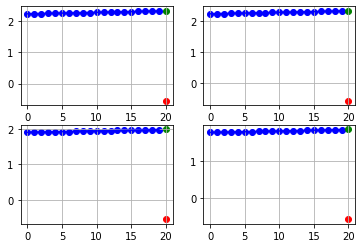

grad_step = 000030, tr_loss = 0.000345, te_loss = 0.944449
grad_step = 000060, tr_loss = 0.000022, te_loss = 0.944449
grad_step = 000090, tr_loss = 0.000005, te_loss = 0.944449


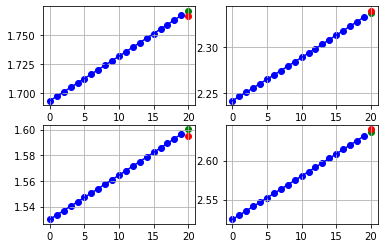

grad_step = 000120, tr_loss = 0.000003, te_loss = 0.000001
grad_step = 000150, tr_loss = 0.000002, te_loss = 0.000001
grad_step = 000180, tr_loss = 0.000002, te_loss = 0.000001


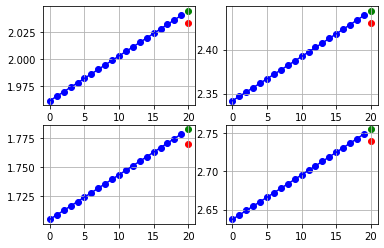

grad_step = 000210, tr_loss = 0.000002, te_loss = 0.000020
grad_step = 000240, tr_loss = 0.000002, te_loss = 0.000020
grad_step = 000270, tr_loss = 0.000002, te_loss = 0.000020
grad_step = 000300, tr_loss = 0.000002, te_loss = 0.000020
(2621, 1)


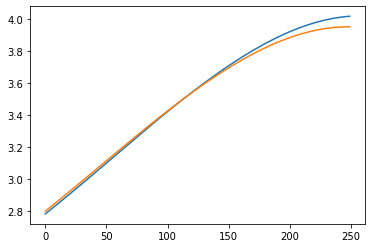

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753822181456
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753822181456
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753822181456
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753718477456
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753718477456
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753718477456


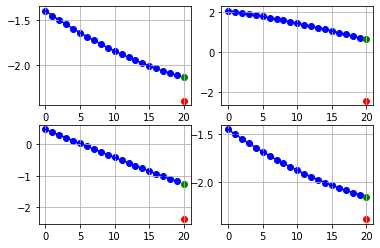

grad_step = 000030, tr_loss = 0.029778, te_loss = 1.634504
grad_step = 000060, tr_loss = 0.002545, te_loss = 1.634504
grad_step = 000090, tr_loss = 0.000221, te_loss = 1.634504


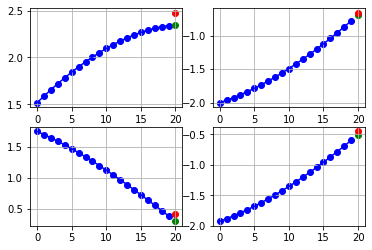

grad_step = 000120, tr_loss = 0.000100, te_loss = 0.001862
grad_step = 000150, tr_loss = 0.000077, te_loss = 0.001862
grad_step = 000180, tr_loss = 0.000080, te_loss = 0.001862


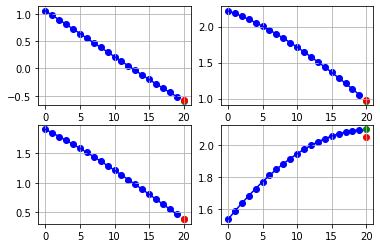

grad_step = 000210, tr_loss = 0.000062, te_loss = 0.000333
grad_step = 000240, tr_loss = 0.000059, te_loss = 0.000333
grad_step = 000270, tr_loss = 0.000051, te_loss = 0.000333
grad_step = 000300, tr_loss = 0.000048, te_loss = 0.000333
(2621, 1)


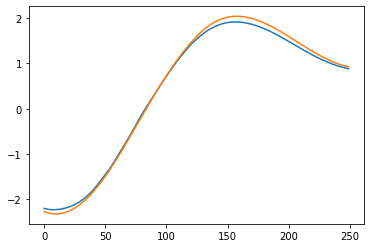

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753796176144
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753796176144
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753796176144
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753718641296
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753718641296
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753718641296


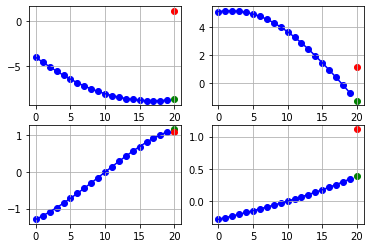

grad_step = 000030, tr_loss = 0.004876, te_loss = 0.299331
grad_step = 000060, tr_loss = 0.000448, te_loss = 0.299331
grad_step = 000090, tr_loss = 0.000261, te_loss = 0.299331


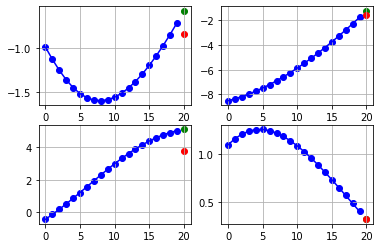

grad_step = 000120, tr_loss = 0.000179, te_loss = 0.007552
grad_step = 000150, tr_loss = 0.000082, te_loss = 0.007552
grad_step = 000180, tr_loss = 0.000025, te_loss = 0.007552


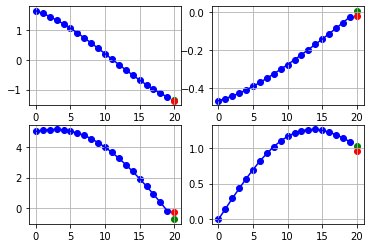

grad_step = 000210, tr_loss = 0.000026, te_loss = 0.005277
grad_step = 000240, tr_loss = 0.000014, te_loss = 0.005277
grad_step = 000270, tr_loss = 0.000011, te_loss = 0.005277
grad_step = 000300, tr_loss = 0.000010, te_loss = 0.005277


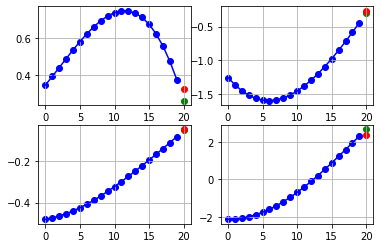

grad_step = 000330, tr_loss = 0.000009, te_loss = 0.004778
grad_step = 000360, tr_loss = 0.000008, te_loss = 0.004778
grad_step = 000390, tr_loss = 0.000008, te_loss = 0.004778


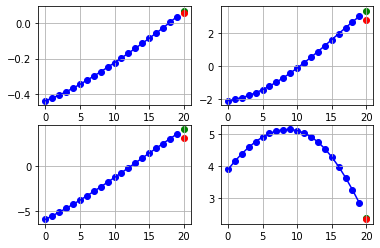

grad_step = 000420, tr_loss = 0.000007, te_loss = 0.004544
grad_step = 000450, tr_loss = 0.000007, te_loss = 0.004544
grad_step = 000480, tr_loss = 0.000095, te_loss = 0.004544


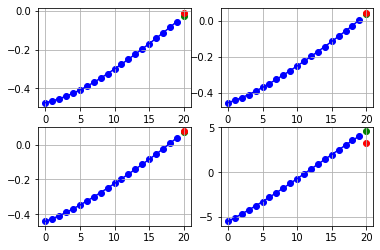

grad_step = 000510, tr_loss = 0.000008, te_loss = 0.004452
grad_step = 000540, tr_loss = 0.000006, te_loss = 0.004452
grad_step = 000570, tr_loss = 0.000006, te_loss = 0.004452
grad_step = 000600, tr_loss = 0.000005, te_loss = 0.004452
(2621, 1)


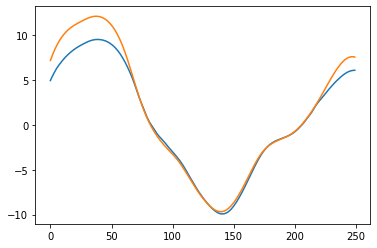

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753824706640
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753824706640
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753824706640
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753819255568
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753819255568
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753819255568


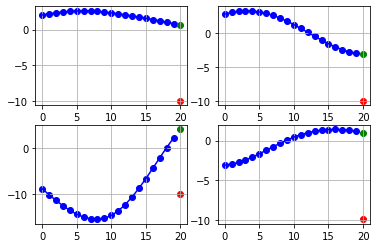

grad_step = 000030, tr_loss = 0.012956, te_loss = 0.833958
grad_step = 000060, tr_loss = 0.002860, te_loss = 0.833958
grad_step = 000090, tr_loss = 0.001322, te_loss = 0.833958


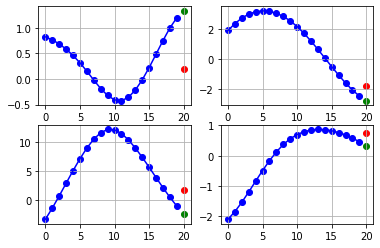

grad_step = 000120, tr_loss = 0.000698, te_loss = 0.103011
grad_step = 000150, tr_loss = 0.000229, te_loss = 0.103011
grad_step = 000180, tr_loss = 0.000132, te_loss = 0.103011


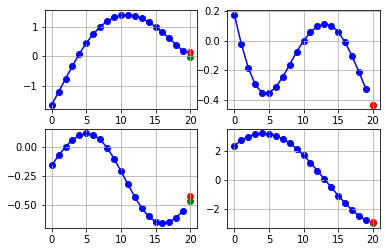

grad_step = 000210, tr_loss = 0.000100, te_loss = 0.025178
grad_step = 000240, tr_loss = 0.000082, te_loss = 0.025178
grad_step = 000270, tr_loss = 0.000068, te_loss = 0.025178
grad_step = 000300, tr_loss = 0.000055, te_loss = 0.025178


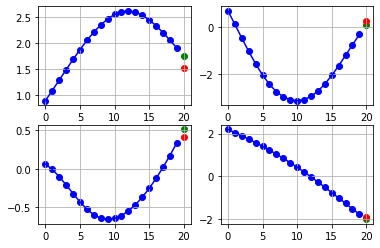

grad_step = 000330, tr_loss = 0.000048, te_loss = 0.023348
grad_step = 000360, tr_loss = 0.000040, te_loss = 0.023348
grad_step = 000390, tr_loss = 0.000035, te_loss = 0.023348


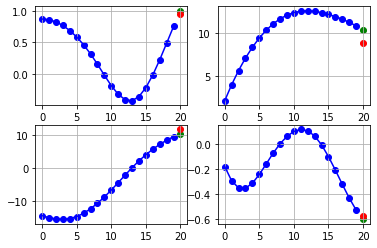

grad_step = 000420, tr_loss = 0.000031, te_loss = 0.021517
grad_step = 000450, tr_loss = 0.000029, te_loss = 0.021517
grad_step = 000480, tr_loss = 0.000026, te_loss = 0.021517


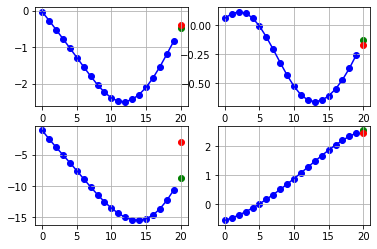

grad_step = 000510, tr_loss = 0.000028, te_loss = 0.019832
grad_step = 000540, tr_loss = 0.000023, te_loss = 0.019832
grad_step = 000570, tr_loss = 0.000022, te_loss = 0.019832
grad_step = 000600, tr_loss = 0.000022, te_loss = 0.019832
(2621, 1)


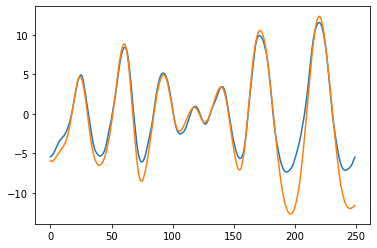

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753700294224
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753700294224
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753700294224
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753705701200
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753705701200
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753705701200


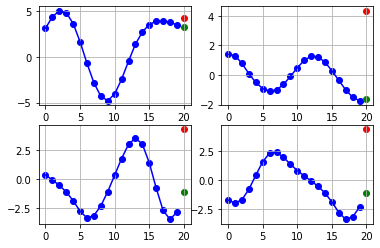

grad_step = 000030, tr_loss = 0.007288, te_loss = 0.232269
grad_step = 000060, tr_loss = 0.002013, te_loss = 0.232269
grad_step = 000090, tr_loss = 0.001019, te_loss = 0.232269


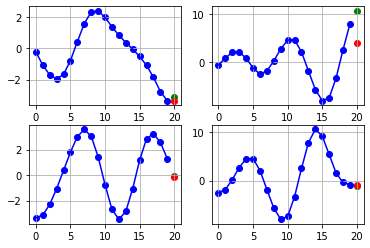

grad_step = 000120, tr_loss = 0.000612, te_loss = 0.014914
grad_step = 000150, tr_loss = 0.000352, te_loss = 0.014914
grad_step = 000180, tr_loss = 0.000228, te_loss = 0.014914


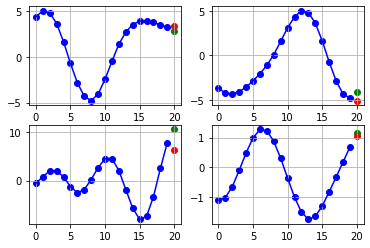

grad_step = 000210, tr_loss = 0.000248, te_loss = 0.011069
grad_step = 000240, tr_loss = 0.000168, te_loss = 0.011069
grad_step = 000270, tr_loss = 0.000144, te_loss = 0.011069
grad_step = 000300, tr_loss = 0.000183, te_loss = 0.011069
(2621, 1)


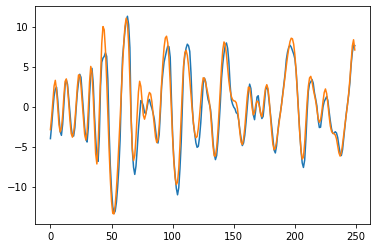

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753794083408
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753794083408
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753794083408
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753817507792
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753817507792
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753817507792


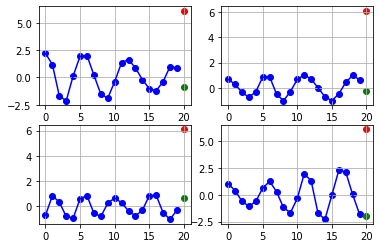

grad_step = 000030, tr_loss = 0.018783, te_loss = 0.692528
grad_step = 000060, tr_loss = 0.009376, te_loss = 0.692528
grad_step = 000090, tr_loss = 0.004495, te_loss = 0.692528


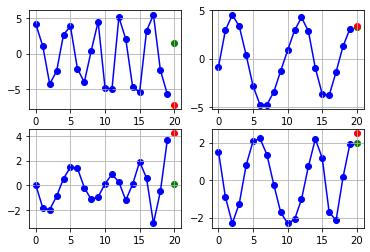

grad_step = 000120, tr_loss = 0.002790, te_loss = 0.081735
grad_step = 000150, tr_loss = 0.002139, te_loss = 0.081735
grad_step = 000180, tr_loss = 0.001750, te_loss = 0.081735


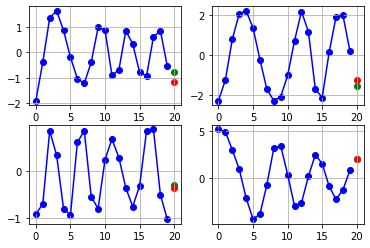

grad_step = 000210, tr_loss = 0.001489, te_loss = 0.040912
grad_step = 000240, tr_loss = 0.001263, te_loss = 0.040912
grad_step = 000270, tr_loss = 0.001119, te_loss = 0.040912
grad_step = 000300, tr_loss = 0.001122, te_loss = 0.040912
(2621, 1)


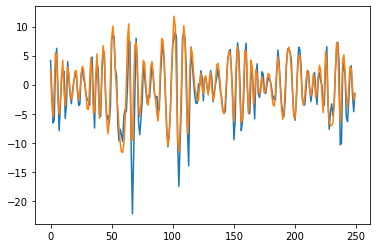

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=True)
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753832908112
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753832908112
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139753832908112
| --  Stack Seasonality (#1) (share_weights_in_stack=True)
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753816541520
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753816541520
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139753816541520


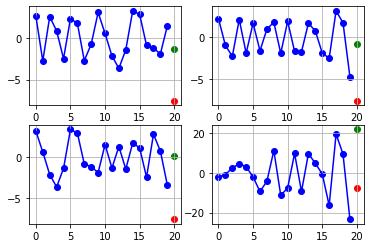

grad_step = 000030, tr_loss = 0.003116, te_loss = 0.161402
grad_step = 000060, tr_loss = 0.002084, te_loss = 0.161402
grad_step = 000090, tr_loss = 0.001862, te_loss = 0.161402


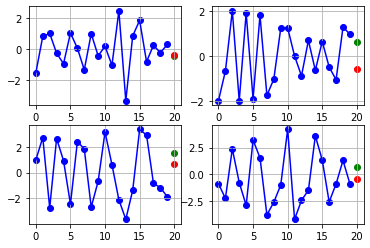

grad_step = 000120, tr_loss = 0.001635, te_loss = 0.035745
grad_step = 000150, tr_loss = 0.001439, te_loss = 0.035745
grad_step = 000180, tr_loss = 0.001253, te_loss = 0.035745


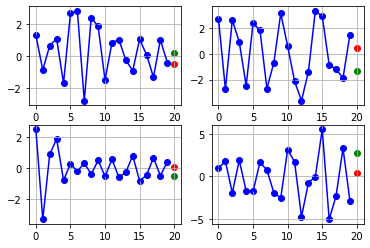

grad_step = 000210, tr_loss = 0.001115, te_loss = 0.044617
grad_step = 000240, tr_loss = 0.001067, te_loss = 0.044617
grad_step = 000270, tr_loss = 0.000882, te_loss = 0.044617
grad_step = 000300, tr_loss = 0.000814, te_loss = 0.044617
(2621, 1)


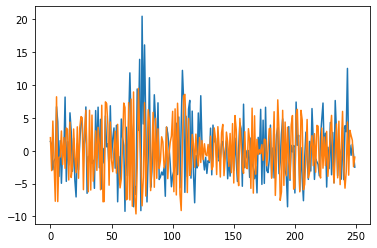

In [ ]:
forecast={}
models={}
for i in reversed(features):
  data=df_norm[i]
  data=np.array(data)
  data=data.reshape(-1,1)
  # print(i)
  models[i]=NeuralBeats(data=data,forecast_length=1,train_percent=0.9,backcast_length=20,mode='cpu',stack=[1,3],thetas_dims=[8,4],share_weights_in_stack=True,nb_blocks_per_stack=3,hidden_layer_units=256)
  epochs=0
  if i=='d' or i=='e':
    epochs=6
  else:
    epochs=3
  models[i].fit(epoch=epochs,optimiser=torch.optim.AdamW(models[i].parameters, lr=0.001, betas=(0.9, 0.999), eps=1e-07, weight_decay=0.01, amsgrad=False))
  input_predict=[]
  output_predict=[]
  datta=np.array(df_test_norm[i])
  print(data.shape)
  data_test=np.array(df_test_norm[i][-250:])
  data_train=np.array(df_norm[i])
  for k in range(len(data_test)):
    x=[]
    output_predict.append(data_test[k])
    for j in range(20):
      x.append(datta[len(data_train)-20+k+j])
    input_predict.append(x)
    # if k==1:
      # print(len(output_predict),output_predict,input_predict)
      # print("1111",data_test[k])
    # x=np.array(x)
    # print(x.shape)
  input_predict=np.array(input_predict)
  output_predict=np.array(output_predict)
  forecast[i]=[]
  # cnt=0
  for j in range(len(output_predict)):
    # print(input_predict[j].shape)
    x=models[i].predict(predict_data=input_predict[j])
    # if cnt==0:
      # print(x)
      # print(input_predict[j])
    # cnt+=1
    forecast[i].append(x)
  x=df_test_norm[i][-250:]
  x=np.array(x)
  x=x.reshape(-1,1)
  forecast[i]=np.array(forecast[i])
  forecast[i]=forecast[i].reshape(-1,1)
  plt.plot(np.array(forecast[i]))
  plt.plot(x)
  plt.show()

In [ ]:
forecast={}
for i in reversed(features):
  input_predict=[]
  output_predict=[]
  datta=np.array(df_test_norm[i])
  print(data.shape)
  data_test=np.array(df_test_norm[i][-250:])
  data_train=np.array(df_norm[i])
  for k in range(len(data_test)):
    x=[]
    output_predict.append(data_test[k])
    for j in range(20):
      x.append(datta[len(data_train)-20+k+j])
    input_predict.append(x)
    # if k==1:
      # print(len(output_predict),output_predict,input_predict)
      # print("1111",data_test[k])
    # x=np.array(x)
    # print(x.shape)
  input_predict=np.array(input_predict)
  output_predict=np.array(output_predict)
  forecast[i]=[]
  # cnt=0
  for j in range(len(output_predict)):
    # print(input_predict[j].shape)
    x=models[i].predict(predict_data=input_predict[j])
    # if cnt==0:
      # print(x)
      # print(input_predict[j])
    # cnt+=1
    forecast[i].append(x)
  forecast[i]=np.array(forecast[i])
  forecast[i]=forecast[i].reshape(-1,1)

(2621, 1)
(2621, 1)
(2621, 1)
(2621, 1)
(2621, 1)
(2621, 1)
(2621, 1)


g
f
e
d
c
b
a


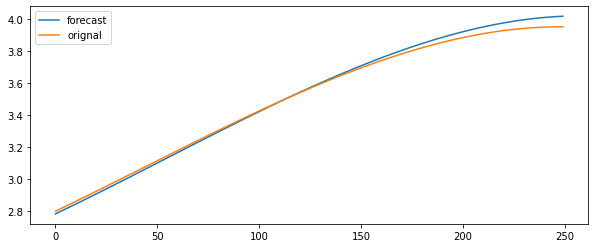

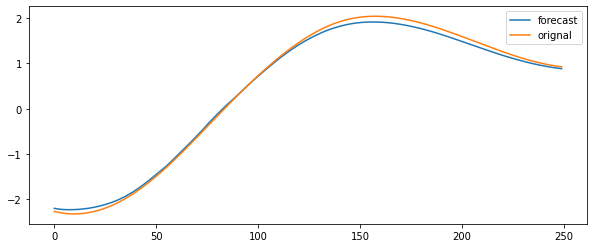

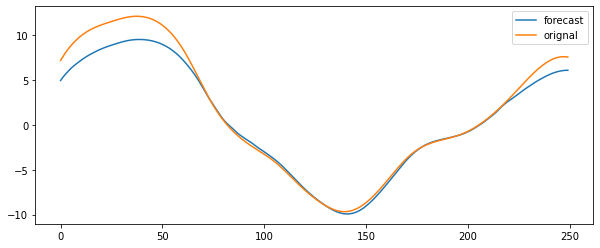

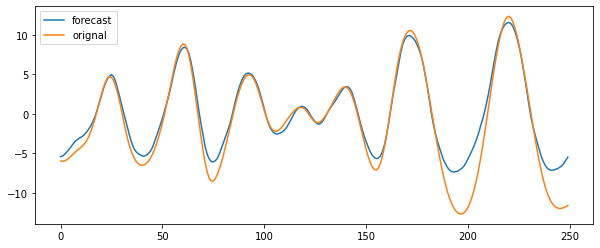

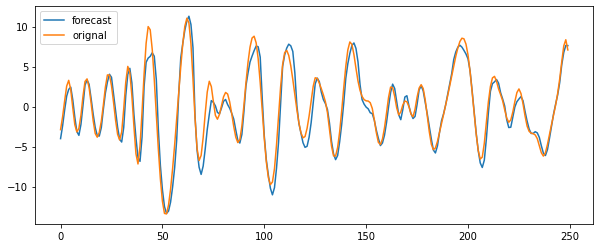

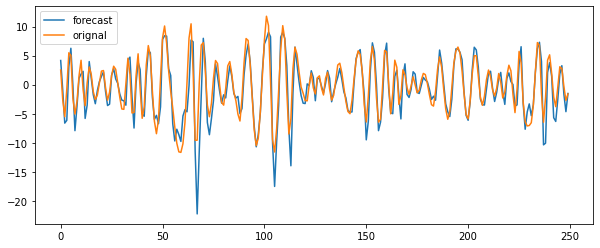

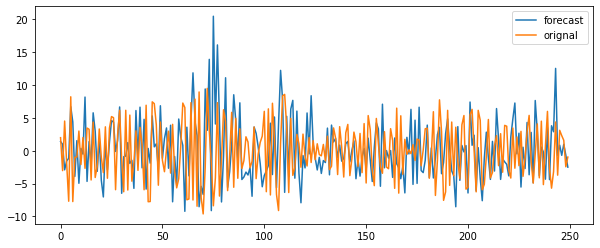

In [ ]:
for i in reversed(features):
  x=df_test_norm[i][-250:]
  x=np.array(x)
  x=x.reshape(-1,1)
  plt.figure(figsize=(10,4))
  plt.plot(forecast[i],label='forecast')
  plt.plot(x,label='orignal')
  plt.legend()
  print(i)

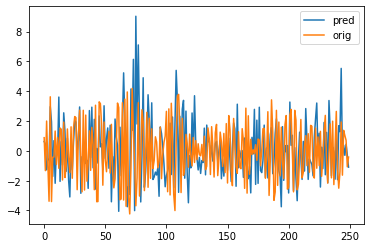

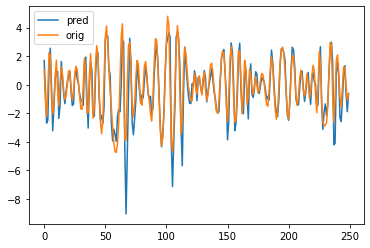

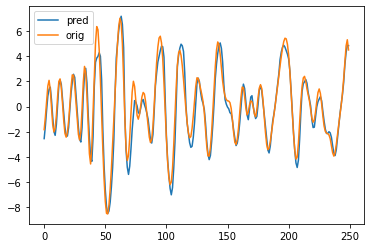

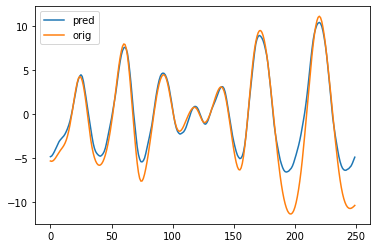

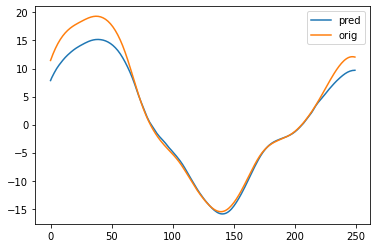

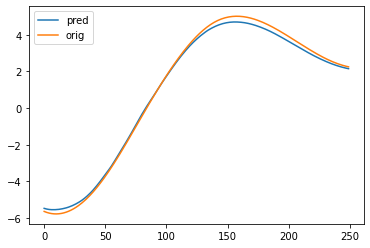

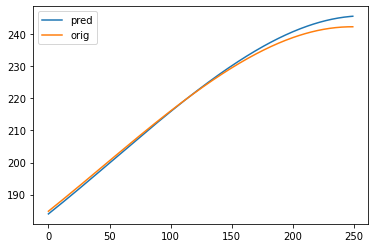

In [ ]:
y_given={}
for i in stockList:
  scaler = RobustScaler()
  scaler.fit(np.array(d[i]).reshape(-1,1))
  # data_min = scaler.data_min_[0]
  # data_range = scaler.data_range_[0]
  forecast[i] = scaler.inverse_transform(forecast[i])
  y_given[i]= scaler.inverse_transform(np.array(df_test_norm[i][-250:]).reshape(-1,1))
  # print(data_range)
  plt.plot(np.array(forecast[i]),label='pred')
  plt.plot(np.array(df_test[i][-250:]),label='orig')
  plt.legend()
  plt.show()

In [ ]:
f=forecast['b']+forecast['c']+forecast['d']+forecast['e']+forecast['f']+forecast['g']

In [ ]:
len(f)

250

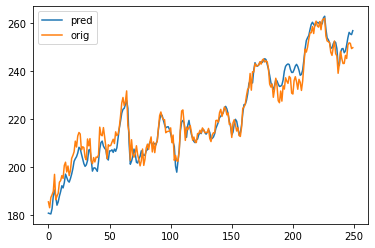

In [ ]:
y=np.array(forecast['g']+forecast['f']+forecast['d']+forecast['c']+forecast['b'])
# plt.plot(forecast['h']+forecast['f']+forecast['d']+forecast['c']+forecast['b'],label='pred')
y=np.array(df_test['g'][-250:]+df_test['f'][-250:]+df_test['d'][-250:]+df_test['c'][-250:]+df_test['b'][-250:]+df_test['e'][-250:])
plt.plot(f,label='pred')
# plt.plot()
x=np.array(df['Microsoft'][-250:])
plt.plot(x,label='orig')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(f,x, squared=False)

3.669444782356265

In [ ]:
mape = tf.keras.losses.MeanAbsolutePercentageError()
print(mape(f,x))

tf.Tensor(9.427125930786133, shape=(), dtype=float64)


In [ ]:
x=s_test.iloc[:,-1]

In [ ]:
f

In [ ]:
len(f)

250

In [ ]:
mape = tf.keras.losses.MeanAbsolutePercentageError()
print(mape(f,x))

tf.Tensor(5.689224720001221, shape=(), dtype=float64)


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(f,x, squared=False)

2.3412892958733766

In [ ]:
loss={}
for i in stockList:
  loss[i]=mape(df_new[i]['Test'],forecast[i])
  print(loss[i])

tf.Tensor(11.077763, shape=(), dtype=float32)
tf.Tensor(4.2736497, shape=(), dtype=float32)
tf.Tensor(5.7414217, shape=(), dtype=float32)


# LSTM

In [ ]:
from sklearn.preprocessing import RobustScaler  

In [ ]:
df_lstm=df

In [ ]:
f_transformer={}
for i in stockList:
  f_transformer[i]=RobustScaler()
  f_transformer[i]=f_transformer[i].fit(df_lstm[i].values.reshape(-1,1))
  df_lstm[i]=f_transformer[i].transform(df_lstm[i].values.reshape(-1,1))    

In [ ]:
df_lstm.head()

,Walmart,Alphabet,Microsoft
Date,,,
2016-01-04,-0.806155,-0.905286,-0.572725
2016-01-05,-0.772623,-0.903444,-0.569924
2016-01-06,-0.758153,-0.900856,-0.581130
2016-01-07,-0.724162,-0.943734,-0.602196
2016-01-08,-0.758383,-0.973397,-0.600403


In [ ]:
df_new_lstm = {}
for i in stockList:
    df_new_lstm[i] = {}
    df_new_lstm[i]["Train"], df_new_lstm[i]["Test"],df_new_lstm[i]["Complete"] = split(df_lstm, "2021-01-01", i)

In [ ]:
len(df_new_lstm["Alphabet"]["Train"])

1259

In [ ]:
def create_dataset(X,y,z,time_steps=1):
  Xs,ys=[],[]
  if z:
    for i in range(len(X)-time_steps):
      v=X.iloc[i:(i+time_steps)].to_numpy()
      Xs.append(v)
      ys.append(y.iloc[(i+time_steps)])
  else:
    for i in range(len(y)-len(X)):
      t=y.iloc[len(X)+i]
      ys.append(t)
      v=y.iloc[(len(X)-time_steps+i):(len(X)+i)].to_numpy()
      # print(v.shape)
      Xs.append(v)
      # for j in range(time_steps):
      #   v=y.iloc[len(X)-time_steps+j+i]
      #   Xs.append(v)
        
  return np.array(Xs),np.array(ys)

In [ ]:
X={}
y={}
for i in stockList:
  X[i]={}
  y[i]={}
  time_steps=30
  X[i]["Train"],y[i]["Train"]=create_dataset(df_new_lstm[i]["Train"], df_new_lstm[i]["Train"],True,time_steps=time_steps)
  X[i]["Test"],y[i]["Test"]=create_dataset(df_new_lstm[i]["Train"], df_new_lstm[i]["Complete"],False,time_steps=time_steps)

In [ ]:
X["Walmart"]["Train"].shape

(1229, 30)

In [ ]:
for i in stockList:
  X[i]["Train"]=X[i]["Train"].reshape(X[i]["Train"].shape[0],X[i]["Train"].shape[1],1)
  y[i]["Test"]=y[i]["Test"].reshape(y[i]["Test"].shape[0],1)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
models={}
for i in stockList:
  models[i]=keras.Sequential()
  models[i].add(keras.layers.LSTM(units=128,return_sequences=True,input_shape=(X[i]["Train"].shape[1],X[i]["Train"].shape[2])))
  models[i].add(keras.layers.LSTM(units=64,return_sequences=False))
  models[i].add(keras.layers.Dropout(rate=0.2))
  models[i].add(keras.layers.Dense(units=1))

In [ ]:
for i in stockList:
  models[i].compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history={}
for i in stockList:
  history[i]=models[i].fit(X[i]["Train"],y[i]["Train"],epochs=50,batch_size=16,shuffle=False)

Epoch 1/50
77/77 [==============================] - 7s 39ms/step - loss: 0.0473
Epoch 2/50
77/77 [==============================] - 3s 39ms/step - loss: 0.0170
Epoch 3/50
77/77 [==============================] - 3s 39ms/step - loss: 0.0156
Epoch 4/50
77/77 [==============================] - 3s 39ms/step - loss: 0.0126
Epoch 5/50
77/77 [==============================] - 3s 39ms/step - loss: 0.0136
Epoch 6/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0097
Epoch 7/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0099
Epoch 8/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0090
Epoch 9/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0115
Epoch 10/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0083
Epoch 11/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0080
Epoch 12/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0078
Epoch 13/50
77/77 [==================

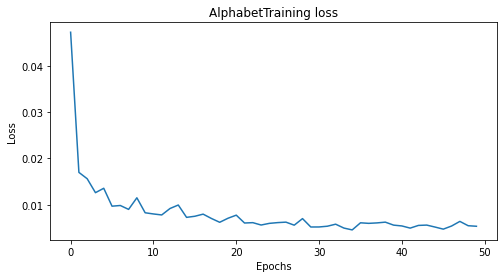

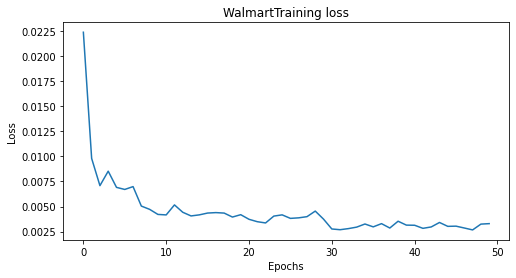

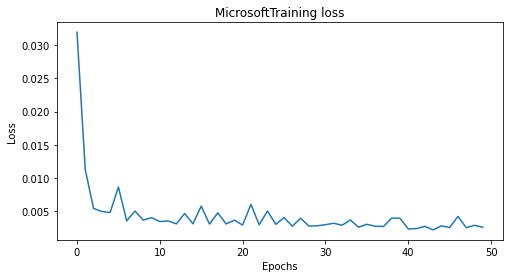

In [ ]:
for i in stockList:
  plt.figure(figsize=(8,4))
  plt.plot(history[i].history['loss'])
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.title(i + "Training loss")

In [ ]:
train_pred,test_pred={},{}
y_pred_test,train_predict={},{}
y_test={}
for i in stockList:
  train_pred[i]=models[i].predict(X[i]["Train"])
  test_pred[i]=models[i].predict(X[i]["Test"])
  y_pred_test[i]=f_transformer[i].inverse_transform(test_pred[i])
  train_predict[i]=f_transformer[i].inverse_transform(train_pred[i])
  y_test[i]=f_transformer[i].inverse_transform(y[i]["Test"])

In [ ]:
y_test["Walmart"].dtype

dtype('float64')

In [ ]:
mape = tf.keras.losses.MeanAbsolutePercentageError()

In [ ]:
for i in stockList:
  print(mape(y_pred_test[i],y_test[i]))


tf.Tensor(1.4542522430419922, shape=(), dtype=float64)
tf.Tensor(2.1749985218048096, shape=(), dtype=float64)
tf.Tensor(1.5586804151535034, shape=(), dtype=float64)


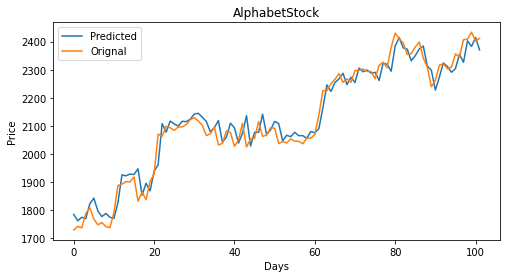

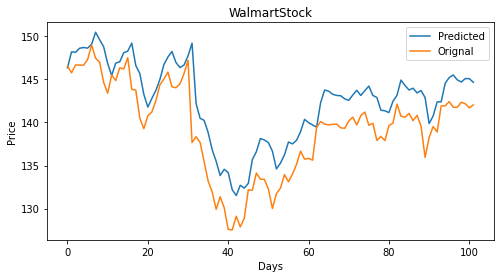

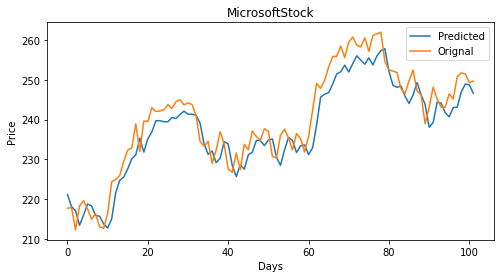

In [ ]:
for i in stockList:
  plt.figure(figsize=(8,4))
  plt.plot(y_pred_test[i],label='Predicted')
  plt.plot(y_test[i],label='Orignal')
  plt.ylabel("Price")
  plt.xlabel("Days")
  plt.title(i + "Stock")
  plt.legend()

# ARIMA AND SARIMA

In [ ]:
df_diff=df

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA,ARMA

In [ ]:
for i in stockList:
  df_diff[i]=df_diff[i].pct_change().dropna()
  # df_diff[i]=df_diff[i][1:]

In [ ]:
df=df.iloc[1:,:]

In [ ]:
df.head()

,Walmart,Alphabet,Microsoft
Date,,,
2016-01-04,61.459999,741.840027,54.799999
2016-01-05,62.919998,742.580017,55.049999
2016-01-06,63.549999,743.619995,54.049999
2016-01-07,65.029999,726.390015,52.169998
2016-01-08,63.540001,714.469971,52.330002


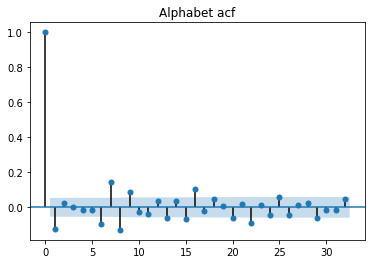

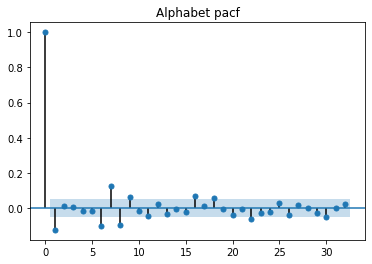

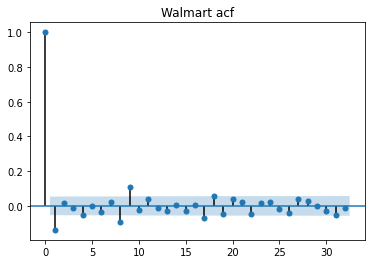

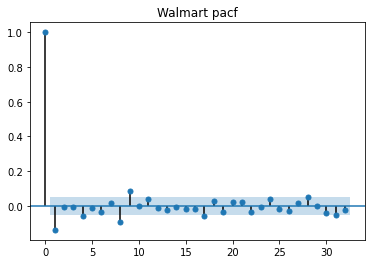

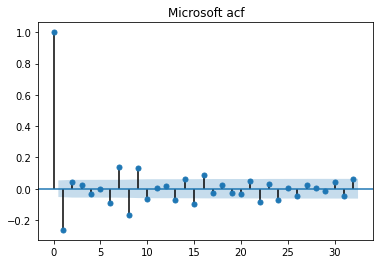

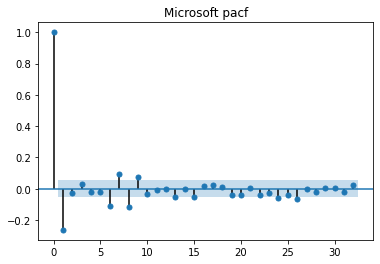

In [ ]:
for i in stockList:
  x=np.array(df_diff[i])
  plot_acf(x)
  plt.title(i+" acf")
  plt.show()
  plot_pacf(x)
  plt.title(i+' pacf')
  plt.show()

In [ ]:
df_s = {}
for i in stockList:
    df_s[i] = {}
    df_s[i]["Train"], df_s[i]["Test"],df_s[i]["Complete"] = split(df, "2021-01-01", i)

In [ ]:
history={}
predictions={}
models_stat={}
model_fit={}
for i in stockList:
  history[i]=[x for x in df_s[i]["Train"]]
  predictions[i]=[]
  for t in range(len(df_s[i]["Test"])):
    models_stat[i]=ARIMA(history[i],order=(0,1,1))
    model_fit[i]=models_stat[i].fit()
    pred=model_fit[i].forecast()
    yhat=pred[0]
    predictions[i].append(yhat)
    obs=df_s[i]["Test"][t]
    history[i].append(obs)

In [ ]:
for i in stockList:
  print(model_fit[i].summary())

In [ ]:
for i in stockList:
  predictions[i]=pd.Series(predictions[i],index=df_s[i]["Test"].index)

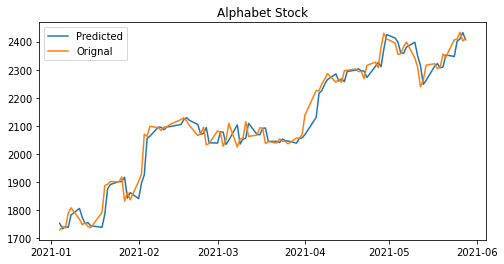

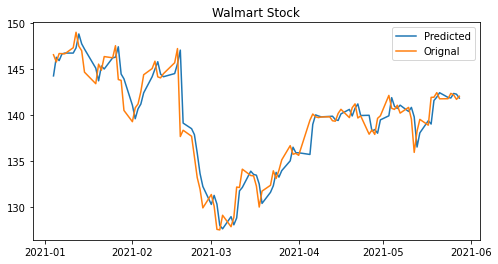

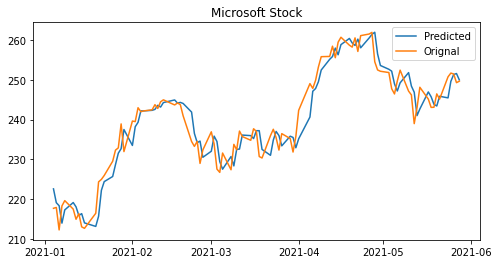

In [ ]:
for i in stockList:
  plt.figure(figsize=(8,4))
  plt.plot(predictions[i],label='Predicted')
  plt.plot(df_s[i]["Test"],label='Orignal')
  plt.title(i+" Stock")
  plt.legend()

In [ ]:
for i in stockList:
  predictions[i]=np.array(predictions[i],dtype=np.float)
  df_s[i]["Test"]=np.array(df_s[i]["Test"],dtype=np.float)
  # print(df_s[i]["Test"].shape)
  print(mape(predictions[i],df_s[i]["Test"]))

tf.Tensor(1.2784394025802612, shape=(), dtype=float64)
tf.Tensor(0.8612291812896729, shape=(), dtype=float64)
tf.Tensor(1.200595736503601, shape=(), dtype=float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
